# Notebook Kelompok 18 Proyek MA3271 Pemodelan Matematika 
* Topik : Pemodelan Biaya Magnetic Resonance Imaging (MRI)
* Kelompok 18 : 
  * 10119001 - Sekar Annasya H
  * 10119013 - Alfini Ridatillah
  * 10119015 - Alfina Rahmadina
  * 10119055 - Muhammad Pudja Gemilang
  * 10119111 - Andika Zidane Faturrahman
* Notebook ini membahas pemodelan premi asuransi kesehatan khusus MRI untuk setiap pasien serta menentukan rate of return dari investasi di pelayanan jasa MRI
* Asumsi yang digunakan :    
  * Biaya yang digunakan adalah biaya masa kini
  * Jumlah klaim antara 1, 2 atau berbanding lurus dengan total biaya 
  * Suku bunganya adalah 8.17% per tahun (Berdasarkan web Prudential)



## Import Package dan Dataset
Keterangan package yang digunakan dan kegunaannya
* **pandas** : Import data dan melakukan manipulasi dataset 
* **matplotlib** dan **seaborn** : Visualisasi data
* **numpy** : Menerapkan basic aljabar linear, statistika dan operasi matematika secara umum




In [ ]:
# Import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Gunakan style ggplot dalam visualisasi
plt.style.use('ggplot')

# Import dataset
df = pd.read_excel('Data MRI.xlsx')

# Print jenis kolom
df.columns

Index(['rtglast', 'umur', 'bl_th', 'rjenis', 'rnmbos', 'biaya', 'biaya3',
       'rdisc', 'bayar', 'selisih', 'selisihx', 'bayarx', 'rkdjasa', 'rnmjasa',
       'rfee', 'diskon', 'disc', 'total_biaya_pelayanan'],
      dtype='object')

In [ ]:
# Menampilkan 5 data pasien teratas
df.head()

,rtglast,umur,bl_th,rjenis,rnmbos,biaya,biaya3,rdisc,bayar,selisih,selisihx,bayarx,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan
0,03-Jan-11,54.0,Tahun,L,Pribadi,4400000,4400000,0,4400000,0,0,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000
1,03-Jan-11,54.0,Tahun,L,Pribadi,4400000,4400000,0,4400000,0,0,4400000,900006,CERVICAL,2200000,0,0,2200000
2,04-Jan-11,70.0,Tahun,L,Pribadi,2200000,2200000,0,2200000,0,0,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000
3,04-Jan-11,49.0,Tahun,P,Pribadi,3200000,3200000,0,3200000,0,0,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000
4,04-Jan-11,49.0,Tahun,P,Pribadi,3200000,3200000,0,3200000,0,0,3200000,900046,KONTRAS I,1000000,0,0,1000000


In [ ]:
df.drop(['rdisc','bayar','selisih','selisihx','bayarx'], axis = 1, inplace = True)

In [ ]:
df.head()

,rtglast,umur,bl_th,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan
0,03-Jan-11,54.0,Tahun,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000
1,03-Jan-11,54.0,Tahun,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000
2,04-Jan-11,70.0,Tahun,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000
3,04-Jan-11,49.0,Tahun,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000
4,04-Jan-11,49.0,Tahun,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000


Keterangan dataset
* rtglast : Tanggal kunjungan pasien
* umur : Umur pasien
* bl_th : Satuan dari umur pasien
* rjenis : Jenis kelamin pasien (L : laki-laki, P : perempuan)
* rnmbos : Jenis jaminan biaya pasien (Pribadi, RS)
* biaya : Biaya total pengobatan pasien setelah didiskon
* biaya3 : Biaya total pengobatan pasien sebelum didiskon
* bayar dan bayarx : Besar nominal pembayaran oleh pasien atas tagihan/klaim
* selisih dan selisihx : Sisa pembayaran
* rkdjasa : Kode unik jenis pelayanan klinik yang diambil oleh pasien
* rnmjasa : Jenis pelayanan klinik yang diambil oleh pasien
* rfee : Besar biaya pelayanan klinik yang diambil oleh pasien
* diskon & disc : Besar diskon biaya pelayanan klinik yang diambil oleh pasien
* total_biaya_pelayanan : Biaya yang harus dibayar oleh pasien terkait pelayanan klinik

## Data Cleaning

### Konversi usia 

Untuk memudahkan perhitungan nanti, pasien dengan satuan umur bulan akan diubah menjadi satuan tahun dengan membagi umur tersebut dengan 12

In [ ]:
def konversi_umur(df):
  # Fungsi konversi umur bulan ke tahun
  for i in range(len(df)):
    if df['bl_th'][i] == 'Bulan':
      df['umur'][i] = np.floor(df['umur'][i]/12)
    else:
      continue
  
  return df

In [ ]:
# Terapkan fungsi pada dataset
df = konversi_umur(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Drop fitur bl_th karena redundant
df.drop(['bl_th'], axis = 1, inplace = True)

In [ ]:
# Tampilkan kembali 5 data teratas
df.head()

,rtglast,umur,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan
0,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000
1,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000
2,04-Jan-11,70.0,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000
3,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000
4,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000


## Bagi Kategori

Dalam perhitungan premi nanti, perlu mengklasifikasikan umur setiap pasien terhadap selang umur yang ditetapkan

In [ ]:
# Buat kolom baru berisi selang umur di mana umur pasien tersebut berada
df['selang_umur'] = pd.qcut(df['umur'], 10)

# Print hasilnya
df['selang_umur'].to_frame()

,selang_umur
0,"(53.0, 57.0]"
1,"(53.0, 57.0]"
2,"(69.0, 91.0]"
3,"(48.0, 53.0]"
4,"(48.0, 53.0]"
...,...
4616,"(-0.001, 14.0]"
4617,"(53.0, 57.0]"
4618,"(53.0, 57.0]"
4619,"(14.0, 27.0]"


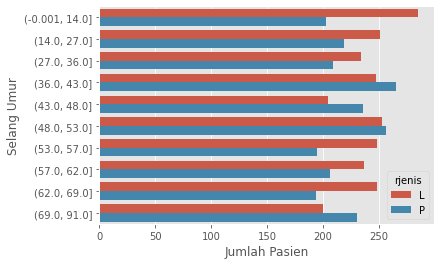

In [ ]:
sns.countplot(data = df, y = 'selang_umur', hue = 'rjenis')
plt.xlabel("Jumlah Pasien")
plt.ylabel("Selang Umur")
plt.show()

Dapat dilihat dari bar plot di atas, jumlah pasien laki-laki berusia 0 - 14 tahun paling banyak, sementara jumlah pasien perempuan berusia 36 - 43 tahun paling banyak 

## Exploratory Data Analysis (EDA)

### Distribusi Biaya Pasien

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


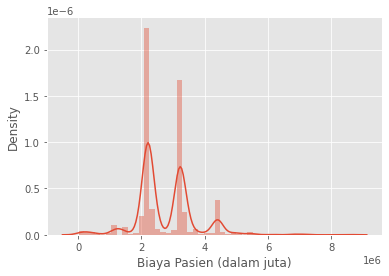

In [ ]:
# Melakukan visualisasi data
import seaborn as sns

sns.distplot(df['biaya'])
plt.xlabel("Biaya Pasien (dalam juta)")
plt.show()

Distribusinya cenderung menceng kanan dengan pasien di klinik tersebut rata-rata  biaya pemeriksaannya adalah Rp 2 juta sampai dengan 3 juta

### Rentang Usia Pasien

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


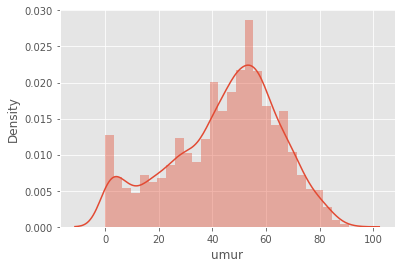

In [ ]:
# Melakukan visualisasi data
import seaborn as sns

sns.distplot(df['umur'])
plt.show()

Kebanyakan pasien yang mengunjungi klinik tersebut berusia 40 - 60 tahun

## Besar Klaim rata-rata per kategori

### Group by rerata total klaim

Akan ditentukan besar klaim rata-rata dari setiap selang umur

In [ ]:
df.head()

,rtglast,umur,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan,selang_umur
0,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(53.0, 57.0]"
1,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000,"(53.0, 57.0]"
2,04-Jan-11,70.0,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(69.0, 91.0]"
3,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000,"(48.0, 53.0]"
4,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000,"(48.0, 53.0]"


In [ ]:
df['rnmjasa'].value_counts().to_frame().head()

,rnmjasa
KEPALA,1173
LUMBOSACRAL,761
KONTRAS I,724
CERVICAL,381
ANGIOGRAPHY PAKET II,283


In [ ]:
# Definisikan total biaya pengobatan sebagai biaya3 (biaya keseluruhan pengobatan pasien)
df['total_biaya'] = df['biaya3']

In [ ]:
# Tampilkan hasil 
df1 = df.groupby(['selang_umur'])['total_biaya'].agg('mean')
df1.to_frame()

,total_biaya
selang_umur,
"(-0.001, 14.0]",3.138637e+06
"(14.0, 27.0]",2.788043e+06
"(27.0, 36.0]",2.690745e+06
"(36.0, 43.0]",2.633242e+06
"(43.0, 48.0]",2.746830e+06
"(48.0, 53.0]",2.708418e+06
"(53.0, 57.0]",2.820068e+06
"(57.0, 62.0]",2.620655e+06
"(62.0, 69.0]",2.761097e+06


In [ ]:
df1.index[0]

Interval(-0.001, 14.0, closed='right')

## Premi

Pada bagian ini, akan ditentukan besar premi untuk setiap pasiennya. Pada bagian premi level akan ditampilkan visualisasi biaya premi beserta biaya pasien dari sampel yang diambil dari data tersebut dengan usia yang berbeda antar pasiennya

### Perhitungan premi tanpa menggunakan produk asuransi tertentu

Kasus 1 adalah jika perhitungan premi murni menggunakan informasi dari datanya, yakni menggunakan rumus premi alami

$\Pi_x = \overline{n}_x \overline{y}_x (1+i)^{-1/2}$ (Untuk kasus 1.1, 1.2)

$\Pi_x = \overline{n}_x y_x (1+i)^{-1/2}$ (Untuk kasus 1.3)

dengan :   

*   $\Pi_x$ : Besar premi alami untuk pasien ke-$x$
*   $\overline{n}_x$ : Rata-rata jumlah klaim/tagihan pasien ke-$x$ di selang umurnya
*   $\overline{y}_x$ : Rata-rata besar biaya klaim/tagihan pasien ke-$x$ di selang umurnya
* $y_x$ : Besar biaya klaim/tagihan pasien ke-$x$
* $i$ : Besar suku bunga dalam 1 tahun (Asumsi $i = 8.27%$)

Premi level adalah nilai rataan dari premi alami berdasarkan selang yang telah ditentukan


#### Kasus 1.1 : Jika jumlah klaimnya berbanding lurus dengan total biaya dibagi dengan rfee

Lebih lanjut, asumsi jumlah klaimnya adalah

$n_x = \lfloor \frac{y_x}{f_x} \rfloor$

dengan :    
* $n_x$ : Jumlah klaim pasien ke-$x$
* $y_x$ : Besar biaya total pasien ke-$x$
* $f_x$ : Besar fee/biaya pelayanan untuk pasien ke-$x$

##### Premi Alami

In [ ]:
df

,rtglast,umur,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan,selang_umur,total_biaya
0,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(53.0, 57.0]",4400000
1,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000,"(53.0, 57.0]",4400000
2,04-Jan-11,70.0,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(69.0, 91.0]",2200000
3,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000,"(48.0, 53.0]",3200000
4,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000,"(48.0, 53.0]",3200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616,31-Dec-11,0.0,P,Pribadi,1200000,1200000,900063,TINDAKAN ANASTESI,1200000,0,0,1200000,"(-0.001, 14.0]",1200000
4617,31-Dec-11,55.0,L,Pribadi,3200000,3200000,900009,THORACO LUMBAL,2200000,0,0,2200000,"(53.0, 57.0]",3200000
4618,31-Dec-11,55.0,L,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000,"(53.0, 57.0]",3200000
4619,31-Dec-11,21.0,P,Pribadi,3200000,3200000,900002,KEPALA,2200000,0,0,2200000,"(14.0, 27.0]",3200000


In [ ]:
# Copy Data
data = df.copy()
data['jumlah_klaim'] = data['total_biaya'] // data['rfee']

# Segmentasi jumlah klaim berdasarkan selang umur
df2 = data.groupby(['selang_umur'])['jumlah_klaim'].agg('mean')
df2.to_frame()

,jumlah_klaim
selang_umur,
"(-0.001, 14.0]",3.215164
"(14.0, 27.0]",2.612766
"(27.0, 36.0]",2.214447
"(36.0, 43.0]",1.808594
"(43.0, 48.0]",2.765909
"(48.0, 53.0]",3.273084
"(53.0, 57.0]",3.049661
"(57.0, 62.0]",2.365688
"(62.0, 69.0]",3.395928


In [ ]:
# Buat kamus
dict_besar_klaim = df1.to_dict()
dict_jumlah_klaim = df2.to_dict()

In [ ]:
# Buat kolom baru menyatakan besar klaim dan jumlah klaim pasien ke-x menurut segmen usianya
data['besar_klaim_per_segmen'] = data['selang_umur'].map(dict_besar_klaim).astype('float64')
data['jumlah_klaim_per_segmen'] = data['selang_umur'].map(dict_jumlah_klaim).astype('float64')

In [ ]:
# Hitung premi alaminya
data['natural_premium'] = data['besar_klaim_per_segmen']*data['jumlah_klaim_per_segmen']*(1+(8.17/100))**(-1/2)

# Hitung selisih klaim dan premi
data['selisih_klaim_premi'] = data['natural_premium'] - data['total_biaya']

# Hitung persentase selisih dengan total biayanya
data['persentase_selisih'] = data['selisih_klaim_premi']/data['total_biaya']*100

# Tampilkan hasilnya
data[['total_biaya','natural_premium','selisih_klaim_premi','persentase_selisih']]

,total_biaya,natural_premium,selisih_klaim_premi,persentase_selisih
0,4400000,8.269091e+06,3.869091e+06,87.933875
1,4400000,8.269091e+06,3.869091e+06,87.933875
2,2200000,1.025486e+07,8.054859e+06,366.129937
3,3200000,8.523531e+06,5.323531e+06,166.360357
4,3200000,8.523531e+06,5.323531e+06,166.360357
...,...,...,...,...
4616,1200000,9.702661e+06,8.502661e+06,708.555046
4617,3200000,8.269091e+06,5.069091e+06,158.409078
4618,3200000,8.269091e+06,5.069091e+06,158.409078
4619,3200000,7.004006e+06,3.804006e+06,118.875179


In [ ]:
# Cetak nilai persentase yang masih 0
new_df = data[['total_biaya','natural_premium','selisih_klaim_premi','persentase_selisih']]
new_df[new_df['persentase_selisih'] < 0]

,total_biaya,natural_premium,selisih_klaim_premi,persentase_selisih
1388,6800000,4.579082e+06,-2.220918e+06,-32.660560
1389,6800000,4.579082e+06,-2.220918e+06,-32.660560
1390,6800000,4.579082e+06,-2.220918e+06,-32.660560
1391,6800000,4.579082e+06,-2.220918e+06,-32.660560
1717,4600000,4.579082e+06,-2.091806e+04,-0.454740
1718,4600000,4.579082e+06,-2.091806e+04,-0.454740
3603,6800000,5.960929e+06,-8.390712e+05,-12.339283
3604,6800000,5.960929e+06,-8.390712e+05,-12.339283
3605,6800000,5.960929e+06,-8.390712e+05,-12.339283
3606,6800000,5.960929e+06,-8.390712e+05,-12.339283


Terdapat 14 pasien yang apabila membayar premi masih belum cukup untuk membayar total biaya pengobatannya

##### Premi Level

In [ ]:
# Buat segmentasi premi level
df3 = data.groupby(['selang_umur'])['natural_premium'].agg('mean')
df3.to_frame()

,natural_premium
selang_umur,
"(-0.001, 14.0]",9.702661e+06
"(14.0, 27.0]",7.004006e+06
"(27.0, 36.0]",5.729074e+06
"(36.0, 43.0]",4.579082e+06
"(43.0, 48.0]",7.304932e+06
"(48.0, 53.0]",8.523531e+06
"(53.0, 57.0]",8.269091e+06
"(57.0, 62.0]",5.960929e+06
"(62.0, 69.0]",9.015436e+06


In [ ]:
dict_premi = df3.to_dict()
data['level_premium'] = data['selang_umur'].map(dict_premi).astype('float64')

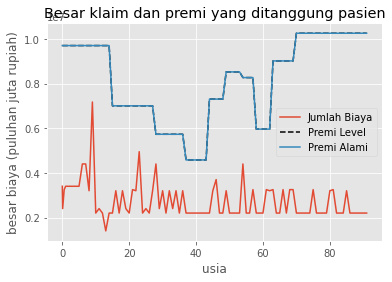

In [ ]:
# Plot klaim untuk user-user dengan usia yang berbeda
umur_klaim = data[['umur','total_biaya','besar_klaim_per_segmen','natural_premium','level_premium']].drop_duplicates(subset = ['umur']).sort_values(by=['umur'], ascending = True)
plt.plot(umur_klaim['umur'], umur_klaim['total_biaya'], label = 'Jumlah Biaya')
plt.plot(umur_klaim['umur'], umur_klaim['level_premium'], color = 'black', linestyle = '--', label = 'Premi Level')
plt.plot(umur_klaim['umur'], umur_klaim['natural_premium'], label = 'Premi Alami')
plt.title('Besar klaim dan premi yang ditanggung pasien')
plt.xlabel('usia')
plt.ylabel('besar biaya (puluhan juta rupiah)')
plt.legend()
plt.show()

Jika menggunakan premi untuk kasus ini, premi alaminya dapat mengcover biaya pengobatan pasien, namun untuk kasus pasien dengan biaya pengobatan yang rendah besar preminya sangat besar sehingga apabila pasien tersebut hanya menggunakan asuransi khusus pelayanan MRI maka akan rugi 

#### Kasus 1.2 : Jika jumlah klaimnya 2 apabila total biaya dan rfee tidak sama dan 1 apabila sama

Dalam hal ini berlaku $n_x = 1$ apabila total biaya pengobatan (biaya3) sama dengan biaya pelayanan apotek (rfee) dan $n_x = 2$ apabila total biaya pengobatan (biaya3) berbeda dengan biaya pelayanan apotek (rfee)

##### Premi Alami

In [ ]:
# Copy data
data1 = df.copy()

# Buat fitur baru
data1['jumlah_klaim'] = 0

# Tentukan jumlah klaim berdasarkan asumsi tersebut
for i in range(len(df)):
  if data1['biaya'][i] == data1['rfee'][i]:
    data1['jumlah_klaim'][i] = 1
  else:
    data1['jumlah_klaim'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df1.to_frame()

,total_biaya
selang_umur,
"(-0.001, 14.0]",3.138637e+06
"(14.0, 27.0]",2.788043e+06
"(27.0, 36.0]",2.690745e+06
"(36.0, 43.0]",2.633242e+06
"(43.0, 48.0]",2.746830e+06
"(48.0, 53.0]",2.708418e+06
"(53.0, 57.0]",2.820068e+06
"(57.0, 62.0]",2.620655e+06
"(62.0, 69.0]",2.761097e+06


In [ ]:
usia = 20
i = 0
while usia not in df2.index[i]:
  i += 1

print(df2.index[i])

(14.0, 27.0]


In [ ]:
df1[df1.index[0]]

3138637.295081967

In [ ]:
2 not in interval

False

In [ ]:
# Buat segmentasi berdasarkan jumlah klaim
df2 = data1.groupby(['selang_umur'])['jumlah_klaim'].agg('mean')
df2.to_frame()

,jumlah_klaim
selang_umur,
"(-0.001, 14.0]",1.627049
"(14.0, 27.0]",1.521277
"(27.0, 36.0]",1.503386
"(36.0, 43.0]",1.470703
"(43.0, 48.0]",1.488636
"(48.0, 53.0]",1.459725
"(53.0, 57.0]",1.476298
"(57.0, 62.0]",1.437923
"(62.0, 69.0]",1.418552


In [ ]:
# Buat kamus
dict_besar_klaim = df1.to_dict()
dict_jumlah_klaim = df2.to_dict()

In [ ]:
# Tentukan besar klaim dan jumlah klaim pasien berdasarkan segmentasi umurnya
data1['besar_klaim_per_segmen'] = data1['selang_umur'].map(dict_besar_klaim).astype('float64')
data1['jumlah_klaim_per_segmen'] = data1['selang_umur'].map(dict_jumlah_klaim).astype('float64')

In [ ]:
# Tentukan premi alamiahnya
data1['natural_premium'] = data1['besar_klaim_per_segmen']*data1['jumlah_klaim_per_segmen']*(1+(8.17/100))**(-1/2)

# Selisihkan premi alami dengan total biaya
data1['selisih_klaim_premi'] = data1['natural_premium'] - data1['total_biaya']

# Bagi dengan total biaya dan kalikan 100
data1['persentase_selisih'] = data1['selisih_klaim_premi']/data1['total_biaya']*100

# Tampilkan hasilnya
data1[['total_biaya','natural_premium','selisih_klaim_premi','persentase_selisih']]

,total_biaya,natural_premium,selisih_klaim_premi,persentase_selisih
0,4400000,4.002950e+06,-3.970502e+05,-9.023868
1,4400000,4.002950e+06,-3.970502e+05,-9.023868
2,2200000,3.500797e+06,1.300797e+06,59.127116
3,3200000,3.801311e+06,6.013108e+05,18.790963
4,3200000,3.801311e+06,6.013108e+05,18.790963
...,...,...,...,...
4616,1200000,4.910078e+06,3.710078e+06,309.173172
4617,3200000,4.002950e+06,8.029498e+05,25.092182
4618,3200000,4.002950e+06,8.029498e+05,25.092182
4619,3200000,4.078065e+06,8.780652e+05,27.439538


In [ ]:
# Tentukan data pasien yang persentasenya kurang dari 0
data1[data1['persentase_selisih'] < 0]

,rtglast,umur,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan,selang_umur,total_biaya,jumlah_klaim,besar_klaim_per_segmen,jumlah_klaim_per_segmen,natural_premium,selisih_klaim_premi,persentase_selisih
0,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(53.0, 57.0]",4400000,2,2.820068e+06,1.476298,4.002950e+06,-3.970502e+05,-9.023868
1,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000,"(53.0, 57.0]",4400000,2,2.820068e+06,1.476298,4.002950e+06,-3.970502e+05,-9.023868
97,10-Jan-11,28.0,P,Pribadi,4400000,4400000,900007,CERVICO THORACAL,2200000,0,0,2200000,"(27.0, 36.0]",4400000,2,2.690745e+06,1.503386,3.889463e+06,-5.105372e+05,-11.603119
98,10-Jan-11,28.0,P,Pribadi,4400000,4400000,900046,KONTRAS I,1000000,0,0,1000000,"(27.0, 36.0]",4400000,2,2.690745e+06,1.503386,3.889463e+06,-5.105372e+05,-11.603119
99,10-Jan-11,28.0,P,Pribadi,4400000,4400000,900063,TINDAKAN ANASTESI,1200000,0,0,1200000,"(27.0, 36.0]",4400000,2,2.690745e+06,1.503386,3.889463e+06,-5.105372e+05,-11.603119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,28-Dec-11,50.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(48.0, 53.0]",4400000,2,2.708418e+06,1.459725,3.801311e+06,-5.986892e+05,-13.606572
4560,28-Dec-11,43.0,L,Pribadi,4000000,4000000,900086,WHOLE SPINE,4000000,0,0,4000000,"(36.0, 43.0]",4000000,1,2.633242e+06,1.470703,3.723595e+06,-2.764053e+05,-6.910132
4561,28-Dec-11,48.0,P,Pribadi,4000000,4000000,900086,WHOLE SPINE,4000000,0,0,4000000,"(43.0, 48.0]",4000000,1,2.746830e+06,1.488636,3.931578e+06,-6.842180e+04,-1.710545
4600,30-Dec-11,68.0,P,Pribadi,5450000,5450000,900034,ANGIOGRAPHY PAKET II,3250000,0,0,3250000,"(62.0, 69.0]",5450000,2,2.761097e+06,1.418552,3.765941e+06,-1.684059e+06,-30.900157


Ada 318 pasien yang biaya pengobatannya belum bisa terkover dari preminya

##### Premi Level

In [ ]:
# Tetapkan premi level untuk setiap selang umur
df3 = data1.groupby(['selang_umur'])['natural_premium'].agg('mean')
df3.to_frame()

,natural_premium
selang_umur,
"(-0.001, 14.0]",4.910078e+06
"(14.0, 27.0]",4.078065e+06
"(27.0, 36.0]",3.889463e+06
"(36.0, 43.0]",3.723595e+06
"(43.0, 48.0]",3.931578e+06
"(48.0, 53.0]",3.801311e+06
"(53.0, 57.0]",4.002950e+06
"(57.0, 62.0]",3.623198e+06
"(62.0, 69.0]",3.765941e+06


In [ ]:
# Buat fitur level premium
dict_premi = df3.to_dict()
data1['level_premium'] = data1['selang_umur'].map(dict_premi).astype('float64')

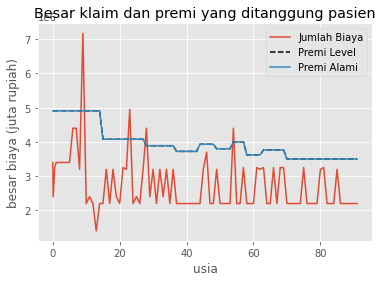

In [ ]:
# Plot klaim untuk user-user dengan usia yang berbeda
umur_klaim1 = data1[['umur','total_biaya','besar_klaim_per_segmen','natural_premium','level_premium']].drop_duplicates(subset = ['umur']).sort_values(by=['umur'], ascending = True)
plt.plot(umur_klaim1['umur'], umur_klaim1['total_biaya'], label = 'Jumlah Biaya')
plt.plot(umur_klaim1['umur'], umur_klaim1['level_premium'], color = 'black', linestyle = '--', label = 'Premi Level')
plt.plot(umur_klaim1['umur'], umur_klaim1['natural_premium'], label = 'Premi Alami')
plt.title('Besar klaim dan premi yang ditanggung pasien')
plt.xlabel('usia')
plt.ylabel('besar biaya (juta rupiah)')
plt.legend()
plt.show()

Perhatikan bahwa ada beberapa pasien yang tidak terkover biaya pengobatannya oleh preminya

#### Kasus 1.3 : Jika besar klaimnya bergantung pada jumlah tagihan pasien dan asumsi jumlah klaimnya 2

Dalam hal ini digunakan rumus yang kedua pada deskripsi premi di atas

##### Premi Alami

In [ ]:
data2 = df.copy()
dict_besar_klaim = df1.to_dict()

In [ ]:
df1.to_frame()

,total_biaya
selang_umur,
"(-0.001, 14.0]",3.138637e+06
"(14.0, 27.0]",2.788043e+06
"(27.0, 36.0]",2.690745e+06
"(36.0, 43.0]",2.633242e+06
"(43.0, 48.0]",2.746830e+06
"(48.0, 53.0]",2.708418e+06
"(53.0, 57.0]",2.820068e+06
"(57.0, 62.0]",2.620655e+06
"(62.0, 69.0]",2.761097e+06


In [ ]:
data2['besar_klaim_per_segmen'] = data2['selang_umur'].map(dict_besar_klaim).astype('float64')

In [ ]:
data2['natural_premium'] = data2['total_biaya']*2*(1+(8.17/100))**(-1/2)
data2['selisih_klaim_premi'] = data2['natural_premium'] - data2['total_biaya']
data2['persentase_selisih'] = data2['selisih_klaim_premi']/data2['total_biaya']*100

data2[['total_biaya','natural_premium','selisih_klaim_premi','persentase_selisih']]

,total_biaya,natural_premium,selisih_klaim_premi,persentase_selisih
0,4400000,8.461147e+06,4.061147e+06,92.298803
1,4400000,8.461147e+06,4.061147e+06,92.298803
2,2200000,4.230574e+06,2.030574e+06,92.298803
3,3200000,6.153562e+06,2.953562e+06,92.298803
4,3200000,6.153562e+06,2.953562e+06,92.298803
...,...,...,...,...
4616,1200000,2.307586e+06,1.107586e+06,92.298803
4617,3200000,6.153562e+06,2.953562e+06,92.298803
4618,3200000,6.153562e+06,2.953562e+06,92.298803
4619,3200000,6.153562e+06,2.953562e+06,92.298803


Persentase selisihnya sama karena premi alami dengan total biayannya hampir dua kali lipatnya. Keuntungan model ini, tidak ada pasien yang biaya pengobatannya tidak terkover oleh premi alaminya, tetapi untuk premi levelnya tetap ada pasien yang tidak terkover biayanya dikarenakan distribusi biaya pengobatan yang cukup menceng

##### Premi Level

In [ ]:
df3 = data2.groupby(['selang_umur'])['natural_premium'].agg('mean')
df3

selang_umur
(-0.001, 14.0]    6.035562e+06
(14.0, 27.0]      5.361372e+06
(27.0, 36.0]      5.174270e+06
(36.0, 43.0]      5.063693e+06
(43.0, 48.0]      5.282120e+06
(48.0, 53.0]      5.208256e+06
(53.0, 57.0]      5.422956e+06
(57.0, 62.0]      5.039487e+06
(62.0, 69.0]      5.309557e+06
(69.0, 91.0]      5.068493e+06
Name: natural_premium, dtype: float64

In [ ]:
dict_premi = df3.to_dict()
data2['level_premium'] = data2['selang_umur'].map(dict_premi).astype('float64')

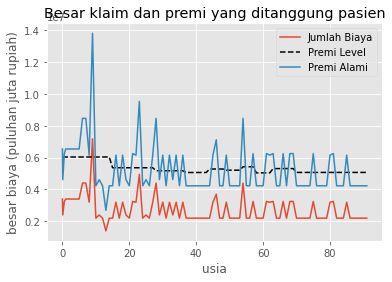

In [ ]:
# Plot klaim untuk user-user dengan usia yang berbeda
umur_klaim2 = data2[['umur','total_biaya','besar_klaim_per_segmen','natural_premium','level_premium']].drop_duplicates(subset = ['umur']).sort_values(by=['umur'], ascending = True)
plt.plot(umur_klaim2['umur'], umur_klaim2['total_biaya'], label = 'Jumlah Biaya')
plt.plot(umur_klaim2['umur'], umur_klaim2['level_premium'], color = 'black', linestyle = '--', label = 'Premi Level')
plt.plot(umur_klaim2['umur'], umur_klaim2['natural_premium'], label = 'Premi Alami')
plt.title('Besar klaim dan premi yang ditanggung pasien')
plt.xlabel('usia')
plt.ylabel('besar biaya (puluhan juta rupiah)')
plt.legend()
plt.show()

Bisa dilihat bahwa premi levelnya tidak dapat mengkover biaya pengobatan pasien yang merupakan pencilan. Keuntungannya adalah hanya 1 pasien yang tidak terkover biayanya

List Biaya :
- Biaya listrik 
- Biaya pelayanan dokter (?)
- Biaya maintenance MRI (?) 
- Biaya beli MRI

### Jika menggunakan asuransi smart health care premier plus

Premi untuk pelayanan MRI ditentukan dari besar tagihan dari pasien tersebut, jadi besar preminya akan sama dengan tagihan pasien tersebut. Premi level dapat ditentukan dari rataan klaim per segmennya

In [ ]:
df1 = df.groupby(['selang_umur'])['total_biaya'].agg('mean')
dict_besar_klaim = df1.to_dict()

In [ ]:
df['besar_klaim_per_segmen'] = df['selang_umur'].map(dict_besar_klaim)

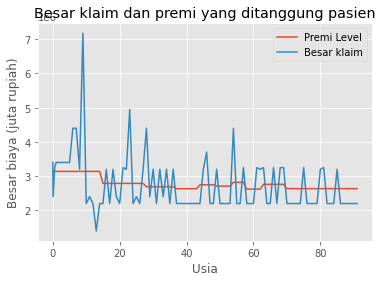

In [ ]:
umur_klaim = df[['umur','besar_klaim_per_segmen','total_biaya']].drop_duplicates(subset = ['umur']).sort_values(by=['umur'], ascending = True)

plt.plot(umur_klaim['umur'], umur_klaim['besar_klaim_per_segmen'], label = 'Premi Level')
plt.plot(umur_klaim['umur'], umur_klaim['total_biaya'], label = 'Besar klaim')

plt.title('Besar klaim dan premi yang ditanggung pasien')
plt.xlabel('Usia')
plt.ylabel('Besar biaya (juta rupiah)')
plt.legend()
plt.show()

Sebagian besar klaimnya tidak terkover oleh premi levelnya, 

## Fungsi Biaya

Pada bagian ini akan ditentukan rate of return dari investasi di pelayanan jasa MRI, bagian ini akan dibagi menjadi 3, biaya pemasukan, biaya pengeluaran dan rate of returnnya

### Pemasukan

#### Kasus 2.1 : Jika total pendapatan dari biaya pasien

In [ ]:
total_pendapatan = df['biaya'].sum()
print(total_pendapatan)

12714276750


Total pendapatannya adalah Rp12.714.276.750,00 murni dari biaya pengobatan pasien dari data tsb

#### Kasus 2.2 : Jika total pendapatan dari premi kasus 1.3

In [ ]:
total_pendapatan_1 = data2['level_premium'].sum()
print(total_pendapatan_1)

24486286347.984447


Total pendapatannya adalah Rp24.486.286.348 (24 miliar rupiah) jika menggunakan premi kasus ketiga

#### Kasus 2.3 : Jika total pendapatannya dari premi asuransi Smart Health Care Premier Plus

In [ ]:
total_pendapatan_2 = df['besar_klaim_per_segmen'].astype('float64').sum()
print(total_pendapatan_2)

12733457500.0


Total pendapatannya adalah Rp12.733.457.500 (12 miliar rupiah) jika menggunakan premi Smart Health Care Premier Plus



#### Kasus 2.4 : Jika mengikuti kasus 1.1

In [ ]:
total_pendapatan_3 = data['level_premium'].astype('float64').sum()
print(total_pendapatan_3)

35160208562.0134


Total pendapatannya adalah Rp35.160.208.562 (35 miliar rupiah)

#### Kasus 2.5 : Jika mengikuti kasus 1.2

In [ ]:
total_pendapatan_4 = data1['level_premium'].astype('float64').sum()
print(total_pendapatan_4)

18155355038.55027


Total pendapatannya adalah Rp18.155.355.038 (18 Miliar rupiah)

### Pengeluaran

#### Rata-rata Penggunaan Listrik MRI per harinya

Asumsi 1 hari ada 32 pasien yang datang ke klinik (dengan mengambil jumlah pasien terbanyak dalam 1 hari), besar daya MRI 3T diketahui 
7160.31 watt/jam

In [ ]:
print("Jumlah kehadiran pasien :",df['rtglast'].value_counts().sort_values(ascending = False))
print("Rata-rata kehadiran pasien :", np.floor(df['rtglast'].value_counts().values.mean()))

Jumlah kehadiran pasien : 11-Oct-11    32
23-Nov-11    29
16-Nov-11    25
07-Jul-11    25
14-Oct-11    25
             ..
30-Apr-11     6
27-Aug-11     5
20-Aug-11     5
07-May-11     2
03-Jan-11     2
Name: rtglast, Length: 298, dtype: int64
Rata-rata kehadiran pasien : 15.0


In [ ]:
# per hari
besar_watt = 32*(7/60)*7160.31
total_biaya_listrik = (besar_watt/1000)*1114.74
print("Total biaya listrik per hari : ",total_biaya_listrik)

Total biaya listrik per hari :  29799.03348576


In [ ]:
# Per tahun
print("Total biaya per tahun : ",total_biaya_listrik*365)

Total biaya per tahun :  10876647.2223024


Biaya listrik per tahun dengan asumsi sebelumnya adalah Rp10.876.648

#### Biaya alat MRI

Jika menggunakan MRI 3T Signa Pioneer maka harga 1 alatnya adalah 
Rp20.479.004.321



#### Biaya Penanganan Dokter

* New Brain Clinic :
  * Rehabilitasi Medis : Rp200.000/sesi
  * Saraf : Rp200.000/sesi
* Umum : Rp250.000 - Rp750.000/sesi


#### Biaya Maintenance MRI

Biaya maintenance MRI ada di kisaran 29 juta - 144 juta, untuk 3T ada di 144 juta

### Rate of Return
Asumsi :    
- Jumlah pasien 32 dalam suatu hari
- Menggunakan 1 alat MRI
- Modal hanya berasal dari pengadaan 1 alat MRI


In [ ]:
# Worst case:
biaya_listrik = total_biaya_listrik
biaya_alat_MRI = 20479004321
biaya_penanganan_dokter = 312*32*200000 # dalam waktu kerja ada 312 hari dan asumsi 32 pasien dalam 1 hari
biaya_maintenance = 4*144*10**6 # Asumsi maintenance 144 juta untuk setiap kuartal (1 tahun ada 4 kuartal)
total_biaya_pengeluaran = biaya_listrik + biaya_alat_MRI + biaya_penanganan_dokter + biaya_maintenance
print("Total Pengeluaran : ", total_biaya_pengeluaran)
print("Total Pemasukan dari biaya pengobatan saja: ", total_pendapatan)
print("Total Pemasukan dari premi level kasus 1.1: ", total_pendapatan_3)
print("Total Pemasukan dari premi level kasus 1.2: ", total_pendapatan_4)
print("Total Pemasukan dari premi level kasus 1.3: ", total_pendapatan_1)
print("Total Pemasukan dari premi Smart Health Care Plus: ", total_pendapatan_2)
print("")

## Persentase keuntungan/kerugian
persen_keuntungan = (total_pendapatan - total_biaya_pengeluaran)/biaya_alat_MRI * 100
persen_keuntungan_1 = (total_pendapatan_1 - total_biaya_pengeluaran)/biaya_alat_MRI * 100
persen_keuntungan_2 = (total_pendapatan_2 - total_biaya_pengeluaran)/biaya_alat_MRI * 100
persen_keuntungan_3 = (total_pendapatan_3 - total_biaya_pengeluaran)/biaya_alat_MRI * 100
persen_keuntungan_4 = (total_pendapatan_4 - total_biaya_pengeluaran)/biaya_alat_MRI * 100

print("Persentase keuntungan dalam 1 tahun jika dari biaya pengobatan saja: ",persen_keuntungan)
print("Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.1 : ", persen_keuntungan_3)
print("Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.2 : ", persen_keuntungan_4)
print("Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.3 : ", persen_keuntungan_1)
print("Persentase keuntungan dalam 1 tahun jika dari premi Smart Health Care Plus : ", persen_keuntungan_2)

Total Pengeluaran :  23051834120.033485
Total Pemasukan dari biaya pengobatan saja:  12714276750
Total Pemasukan dari premi level kasus 1.1:  35160208562.0134
Total Pemasukan dari premi level kasus 1.2:  18155355038.55027
Total Pemasukan dari premi level kasus 1.3:  24486286347.984447
Total Pemasukan dari premi Smart Health Care Plus:  12733457500.0

Persentase keuntungan dalam 1 tahun jika dari biaya pengobatan saja:  -50.47880848109855
Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.1 :  59.12579660703277
Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.2 :  -23.909751688768225
Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.3 :  7.00450180812754
Persentase keuntungan dalam 1 tahun jika dari premi Smart Health Care Plus :  -50.38514792173076


Bisa dilihat bahwa jika klinik hanya menggunakan biaya pengobatan saja atau menggunakan premi Smart Health Care Plus maka mengalami kerugian sebesar -50% tapi jika klinik tersebut menetapkan premi level di kasus 1.3, maka keuntungannya sebesar 7.0%

Jika menetapkan premi kasus 1.1, maka mendapatkan keuntungan 59%, tetapi perlu diingat bahwa premi yang ditetapkan jauh lebih tinggi dibandingkan biaya pengobatannya

Premi kasus 1.2 mendatangkan kerugian yang lebih kecil dibandingkan biaya pengobatan dan Smart Health Care Premier Plus

# Data Deret Waktu per Tanggal

Kolom2nya:
1. Tanggal
2. Pendapatan/pemasukan
  * Bayar MRI make premi atau biaya aslinya
3. Pengeluaran 
  * Biaya rata2 penggunaan listrik (tiap hari)
  * Biaya penanganan dokter (tiap hari kerja)
  * Biaya maintenance MRI (tiap kuartal)

Asumsi udah beli alat MRI 

## Kasus 2.1

In [ ]:
df.head()

,rtglast,umur,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan,selang_umur,total_biaya,besar_klaim_per_segmen
0,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(53.0, 57.0]",4400000,2.820068e+06
1,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000,"(53.0, 57.0]",4400000,2.820068e+06
2,04-Jan-11,70.0,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(69.0, 91.0]",2200000,2.635738e+06
3,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000,"(48.0, 53.0]",3200000,2.708418e+06
4,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000,"(48.0, 53.0]",3200000,2.708418e+06


In [ ]:
df_deret_waktu_1 = df[['rtglast']].drop_duplicates().reset_index().drop(['index'], axis = 1)
df_deret_waktu_1['rtglast'] = pd.to_datetime(df_deret_waktu_1['rtglast'])
df_deret_waktu_1['Total Pasien'] = 0
df_deret_waktu_1['Pemasukan Kasus 2.1'] = 0
df_deret_waktu_1['Pemasukan Kasus 2.2'] = 0
df_deret_waktu_1['Pemasukan Kasus 2.3'] = 0
df_deret_waktu_1['Pemasukan Kasus 2.4'] = 0
df_deret_waktu_1['Pemasukan Kasus 2.5'] = 0
df_deret_waktu_1['Biaya listrik'] = 0
df_deret_waktu_1['Penanganan Dokter'] = 0
df_deret_waktu_1['Biaya Maintenance MRI'] = 0

In [ ]:
df_deret_waktu_1.head()

,rtglast,Total Pasien,Pemasukan Kasus 2.1,Pemasukan Kasus 2.2,Pemasukan Kasus 2.3,Pemasukan Kasus 2.4,Pemasukan Kasus 2.5,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI
0,2011-01-03,0,0,0,0,0,0,0,0,0
1,2011-01-04,0,0,0,0,0,0,0,0,0
2,2011-01-05,0,0,0,0,0,0,0,0,0
3,2011-01-06,0,0,0,0,0,0,0,0,0
4,2011-01-07,0,0,0,0,0,0,0,0,0


In [ ]:
df['rtglast']

0       03-Jan-11
1       03-Jan-11
2       04-Jan-11
3       04-Jan-11
4       04-Jan-11
          ...    
4616    31-Dec-11
4617    31-Dec-11
4618    31-Dec-11
4619    31-Dec-11
4620    31-Dec-11
Name: rtglast, Length: 4621, dtype: object

In [ ]:
df['rtglast'] = pd.to_datetime(df['rtglast'])

### Total Pasien

In [ ]:
pasien_per_hari = df.groupby(['rtglast'])['rkdjasa'].count().to_frame()
df_deret_waktu_1['Total Pasien'] =  pasien_per_hari.values

### Pemasukan

In [ ]:
# Group By
pemasukan_per_hari = df.groupby(['rtglast'])['biaya'].sum()
pemasukan_per_hari = pemasukan_per_hari.to_frame()
pemasukan_per_hari

,biaya
rtglast,
2011-01-03,8800000
2011-01-04,63400000
2011-01-05,28280000
2011-01-06,50650000
2011-01-07,43950000
...,...
2011-12-27,38100000
2011-12-28,61750000
2011-12-29,35209500


In [ ]:
df_deret_waktu_1['Pemasukan Kasus 1.1'] =  pemasukan_per_hari.values

### Biaya Listrik

In [ ]:
besar_watt = df_deret_waktu_1['Total Pasien']*(7/60)*7160.31
total_biaya_listrik = (besar_watt/1000)*1114.74

df_deret_waktu_1['Biaya listrik'] = total_biaya_listrik

### Penanganan Dokter

In [ ]:
df_deret_waktu_1['Penanganan Dokter'] = df_deret_waktu_1['Total Pasien'] * 200*10**3

In [ ]:
df_deret_waktu_1.head()

,rtglast,Total Pasien,Pemasukan Kasus 2.1,Pemasukan Kasus 2.2,Pemasukan Kasus 2.3,Pemasukan Kasus 2.4,Pemasukan Kasus 2.5,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Pemasukan Pelayanan
0,2011-01-03,2,0,0,0,0,0,1862.439593,400000,0,8800000
1,2011-01-04,22,0,0,0,0,0,20486.835521,4400000,0,63400000
2,2011-01-05,11,0,0,0,0,0,10243.417761,2200000,0,28280000
3,2011-01-06,20,0,0,0,0,0,18624.395929,4000000,0,50650000
4,2011-01-07,16,0,0,0,0,0,14899.516743,3200000,0,43950000


In [ ]:
df_deret_waktu_1[df_deret_waktu_1['rtglast'] == '2011-12-01']

,rtglast,Total Pasien,Pemasukan Kasus 2.1,Pemasukan Kasus 2.2,Pemasukan Kasus 2.3,Pemasukan Kasus 2.4,Pemasukan Kasus 2.5,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Pemasukan Pelayanan
272,2011-12-01,17,0,0,0,0,0,15830.736539,3400000,0,45101500


### Maintenance

Asumsi maintenance di awal bulan

In [ ]:
list_kuartal = ['2011-03-01 00:00:00','2011-06-01 00:00:00','2011-09-02 00:00:00','2011-12-01 00:00:00']
df_deret_waktu_1['Biaya Maintenance MRI'] = [144*10**6 if str(df_deret_waktu_1['rtglast'][i]) in list_kuartal else 0 for i in range(len(df_deret_waktu_1))]

In [ ]:
df_deret_waktu_1[df_deret_waktu_1['rtglast'] == '2011-03-01']

,rtglast,Total Pasien,Pemasukan Kasus 2.1,Pemasukan Kasus 2.2,Pemasukan Kasus 2.3,Pemasukan Kasus 2.4,Pemasukan Kasus 2.5,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Pemasukan Pelayanan
47,2011-03-01,18,0,0,0,0,0,16761.956336,3600000,144000000,30255000


### Tampilan

In [ ]:
df_deret_waktu_1['Total Pengeluaran'] =  df_deret_waktu_1['Biaya listrik'] + df_deret_waktu_1['Penanganan Dokter'] + df_deret_waktu_1['Biaya Maintenance MRI']

In [ ]:
df_deret_waktu_1.head()

,rtglast,Total Pasien,Pemasukan Kasus 2.1,Pemasukan Kasus 2.2,Pemasukan Kasus 2.3,Pemasukan Kasus 2.4,Pemasukan Kasus 2.5,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Pemasukan Pelayanan,Total Pengeluaran
0,2011-01-03,2,0,0,0,0,0,1862.439593,400000,0,8800000,4.018624e+05
1,2011-01-04,22,0,0,0,0,0,20486.835521,4400000,0,63400000,4.420487e+06
2,2011-01-05,11,0,0,0,0,0,10243.417761,2200000,0,28280000,2.210243e+06
3,2011-01-06,20,0,0,0,0,0,18624.395929,4000000,0,50650000,4.018624e+06
4,2011-01-07,16,0,0,0,0,0,14899.516743,3200000,0,43950000,3.214900e+06


In [ ]:
df_deret_waktu_1['Rate of Return'] = (df_deret_waktu_1['Pemasukan Pelayanan'] - df_deret_waktu_1['Total Pengeluaran'])/biaya_alat_MRI * 100

In [ ]:
df_deret_waktu_1.head()

,rtglast,Total Pasien,Pemasukan Kasus 2.1,Pemasukan Kasus 2.2,Pemasukan Kasus 2.3,Pemasukan Kasus 2.4,Pemasukan Kasus 2.5,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Pemasukan Pelayanan,Total Pengeluaran,Rate of Return
0,2011-01-03,2,0,0,0,0,0,1862.439593,400000,0,8800000,4.018624e+05,0.041009
1,2011-01-04,22,0,0,0,0,0,20486.835521,4400000,0,63400000,4.420487e+06,0.288000
2,2011-01-05,11,0,0,0,0,0,10243.417761,2200000,0,28280000,2.210243e+06,0.127300
3,2011-01-06,20,0,0,0,0,0,18624.395929,4000000,0,50650000,4.018624e+06,0.227703
4,2011-01-07,16,0,0,0,0,0,14899.516743,3200000,0,43950000,3.214900e+06,0.198912


In [ ]:
df_deret_waktu_1.set_index('rtglast', inplace = True)

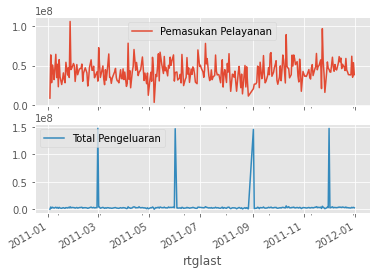

In [ ]:
df_deret_waktu_1[['Pemasukan Pelayanan','Total Pengeluaran']].plot(subplots = True)
plt.show()

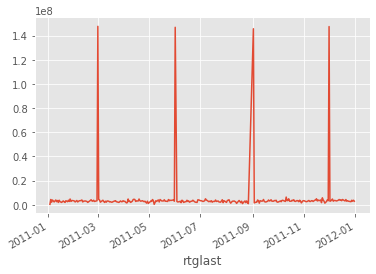

In [ ]:
df_deret_waktu_1['Total Pengeluaran'].plot()
plt.show()

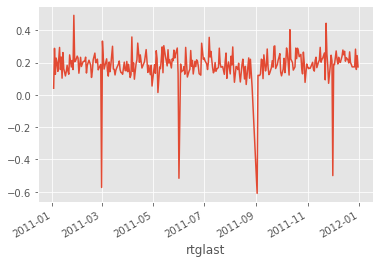

In [ ]:
df_deret_waktu_1['Rate of Return'].plot()
plt.show()

In [ ]:
df_deret_waktu_1.to_csv("Kasus 1.1.csv")